<a href="https://colab.research.google.com/github/AlejandroPinto5/linear-models/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression**

In this notebook is implemented logistic regression on Titanic survival problem. Dataset gives us attribute of passengers who were traveling on the Titanic, so we need to predict wheter they would survived the tragedy or not. DAtaset is already preprocessed.

In [23]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Rreading dataset
url = 'https://raw.githubusercontent.com/AlejandroPinto5/KNN-algorithm/main/data_cleaned.csv'
df = pd.read_csv(url)
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
#Checking NaN values
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
#Checking variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 non-null    i

In [6]:
#Checking stats
df.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,13.002015,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Separating independet an dependet variables
x = df.drop(['Survived'], axis = 1)
y = df['Survived']
x.shape, y.shape

((891, 24), (891,))

In [9]:
# Splitting dataset into train and test set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=56)

In [10]:
#Normalizing train data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = train_x.columns
train_x_scaler = scaler.fit_transform(train_x)
train_x_scaler = pd.DataFrame(train_x_scaler, columns = cols)
train_x_scaler.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
#Transforming test_x
test_x_scaler = scaler.transform(test_x)
test_x_scaler = pd.DataFrame(test_x_scaler,columns = cols)
test_x_scaler.head() #Dataset is normalized

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


After Subsetting data, It is time to implement ***logistic regression***

In [17]:
#Implementing logistic regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

logreg = LogReg(solver='lbfgs', max_iter=3000) # Convergence warning, I'm specifying iterations
logreg.fit(train_x, train_y) #Fitting train set

train_predict = logreg.predict(train_x) #Predicting over train set
k1 = f1_score(train_predict, train_y) #Calculating f1 score
print('Train f1-score: ', k1)

test_predict = logreg.predict(test_x) #Predicting over test set
k2 = f1_score(test_predict, test_y) #Calculating f1 score
print('Test f1-score: ', k2)

Train f1-score:  0.7485148514851485
Test f1-score:  0.7500000000000001


If you Want to know probabilities, you need to use ***predic_proba function***

In [19]:
#predicting over train set with proba function
train_predict = logreg.predict_proba(train_x) #Matrix with probabilitiesoftwo classes
train_preds = train_predict[:,1] #All values between 0 and 1

for i in range(0,len(train_preds)):
  if (train_preds[i] > 0.55): # More than 0.55 of probability
    train_preds[i] = 1    # 1 survived
  else:
    train_preds[i] = 0  #0 NOT SURVIVED

k = f1_score(train_preds, train_y)
print('Train proba f1 score: ', k)

Train proba f1 score:  0.7428571428571429


In [21]:
#Checking confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_y, test_predict)
print(cf)

[[128  16]
 [ 22  57]]


In [22]:
#Checking report
from sklearn.metrics import classification_report as rep
print(rep(test_y, test_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       144
           1       0.78      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



Text(0.5, 1.0, 'coefficient plot')

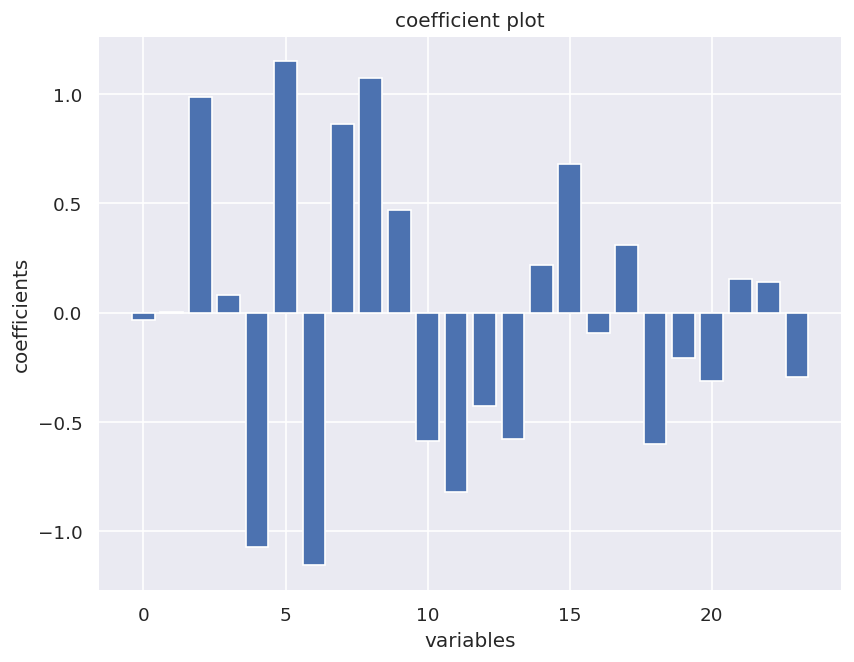

In [29]:
#checking for coefficients of logistic regression
logreg.coef_
sb.set()
sb.set_style('darkgrid')
plt.figure(figsize=(8,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel('variables')
plt.ylabel('coefficients')
plt.title('coefficient plot')